In [1]:
%run /Users/hhg/Research/kinematic_lensing/code/BinnedFit/GaussFit_spec2D.py
%run /Users/hhg/Research/kinematic_lensing/code/BinnedFit/ChainTool.py
%run /Users/hhg/Research/kinematic_lensing/code/BinnedFit/RotationCurveFit.py
%run /Users/hhg/Research/kinematic_lensing/code/BinnedFit/ChainTool.py
%run /Users/hhg/Research/kinematic_lensing/code/BinnedFit/gamma.py


%config InlineBackend.figure_format = 'retina'

import matplotlib.pyplot as plt
import numpy as np

sys.path.append("/Users/hhg/Research/kinematic_lensing/code/BinnedFit/")
from binnedFit_utilities import *


sys.path.append("/Users/hhg/Research/kinematic_lensing/repo/kl_measurement/scripts/")
from parameter_class import fit_parameters
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
import emcee
import chisq
from generate_TFcube import get_TFcube_pars, get_data_TFcube

from chainconsumer import ChainConsumer
%config InlineBackend.figure_format = 'retina'

dir_tfCube: /Users/hhg/Research/kinematic_lensing/repo/KLens


In [2]:
def cal_gamma_bias_err(chain_info):
    
    Chain = ChainTool(chain_info, Nburn=150000, Nend=300000)

    select_par_key = ['gamma_p','gamma_x']
    parID1, parName1, par_x1 = Chain.select_par_info(select_par_key)
    
    bias_error_info = {}
    
    for par_key in select_par_key:
        
        bestfit_now, err_now = Chain.par_bestfit(select_par_key=[par_key], statistics='max', mode=1)
        par_stats = {}
        par_stats['bias'] = bestfit_now[0] - chain_info['par_fid'][par_key]
        par_stats['error'] = err_now[0]
        
        bias_error_info[par_key] = par_stats
         
    return bias_error_info

In [3]:
dir_chain = "/Users/hhg/Research/kinematic_lensing/data/mock_tfCube/chain/"

In [15]:
# g2_list = [0., 0.025, 0.05, 0.075, 0.1]

# ensemble_bias_error = {}

# for g2 in g2_list:
#     sini=0.5
#     g1=0.1    ### [0., 0.025, 0.05, 0.075, 0.1]
    
#     fname_read = f"chain_sini_{sini:.2f}_g1_{g1:.3f}_g2_{g2:.3f}.pkl"
    
#     this_chain_info = load_pickle(dir_chain+fname_read)
    
#     this_bias_error_info = cal_gamma_bias_err(chain_info=this_chain_info)
    
#     chain_key = f"sini_{sini:.2f}_g1_{g1:.3f}_g2_{g2:.3f}"
    
#     ensemble_bias_error[chain_key] = this_bias_error_info

g1_list = [0., 0.025, 0.05, 0.075, 0.1]

ensemble_bias_error = {}

for g1 in g1_list:
    sini=0.5
    g2=0.1    ### [0., 0.025, 0.05, 0.075, 0.1]
    
    fname_read = f"chain_sini_{sini:.2f}_g1_{g1:.3f}_g2_{g2:.3f}.pkl"
    
    this_chain_info = load_pickle(dir_chain+fname_read)
    
    this_bias_error_info = cal_gamma_bias_err(chain_info=this_chain_info)
    
    chain_key = f"sini_{sini:.2f}_g1_{g1:.3f}_g2_{g2:.3f}"
    
    ensemble_bias_error[chain_key] = this_bias_error_info

In [16]:
# sini = 0.5
# g1 = 0.1
# g2_list = [0., 0.025, 0.05, 0.075, 0.1]


# g1_bias_list = []
# g1_err_list = []

# g2_bias_list = []
# g2_err_list = []

# for g2 in g2_list:
    
#     chain_key = f"sini_{sini:.2f}_g1_{g1:.3f}_g2_{g2:.3f}"
    
#     g1_bias_list += [ensemble_bias_error[chain_key]['gamma_p']['bias']]
#     g1_err_list += [ensemble_bias_error[chain_key]['gamma_p']['error']]
    
#     g2_bias_list += [ensemble_bias_error[chain_key]['gamma_x']['bias']]
#     g2_err_list += [ensemble_bias_error[chain_key]['gamma_x']['error']]


sini = 0.5
g1_list = [0., 0.025, 0.05, 0.075, 0.1]
g2 = 0.1

g1_bias_list = []
g1_err_list = []

g2_bias_list = []
g2_err_list = []

for g1 in g1_list:
    
    chain_key = f"sini_{sini:.2f}_g1_{g1:.3f}_g2_{g2:.3f}"
    
    g1_bias_list += [ensemble_bias_error[chain_key]['gamma_p']['bias']]
    g1_err_list += [ensemble_bias_error[chain_key]['gamma_p']['error']]
    
    g2_bias_list += [ensemble_bias_error[chain_key]['gamma_x']['bias']]
    g2_err_list += [ensemble_bias_error[chain_key]['gamma_x']['error']]


In [17]:
g2_bias_list_abs = np.abs(np.array(g2_bias_list))
g1_bias_list_abs = np.abs(np.array(g1_bias_list))

Text(0.5, 0.98, '(sini=0.5, g2=0.1)')

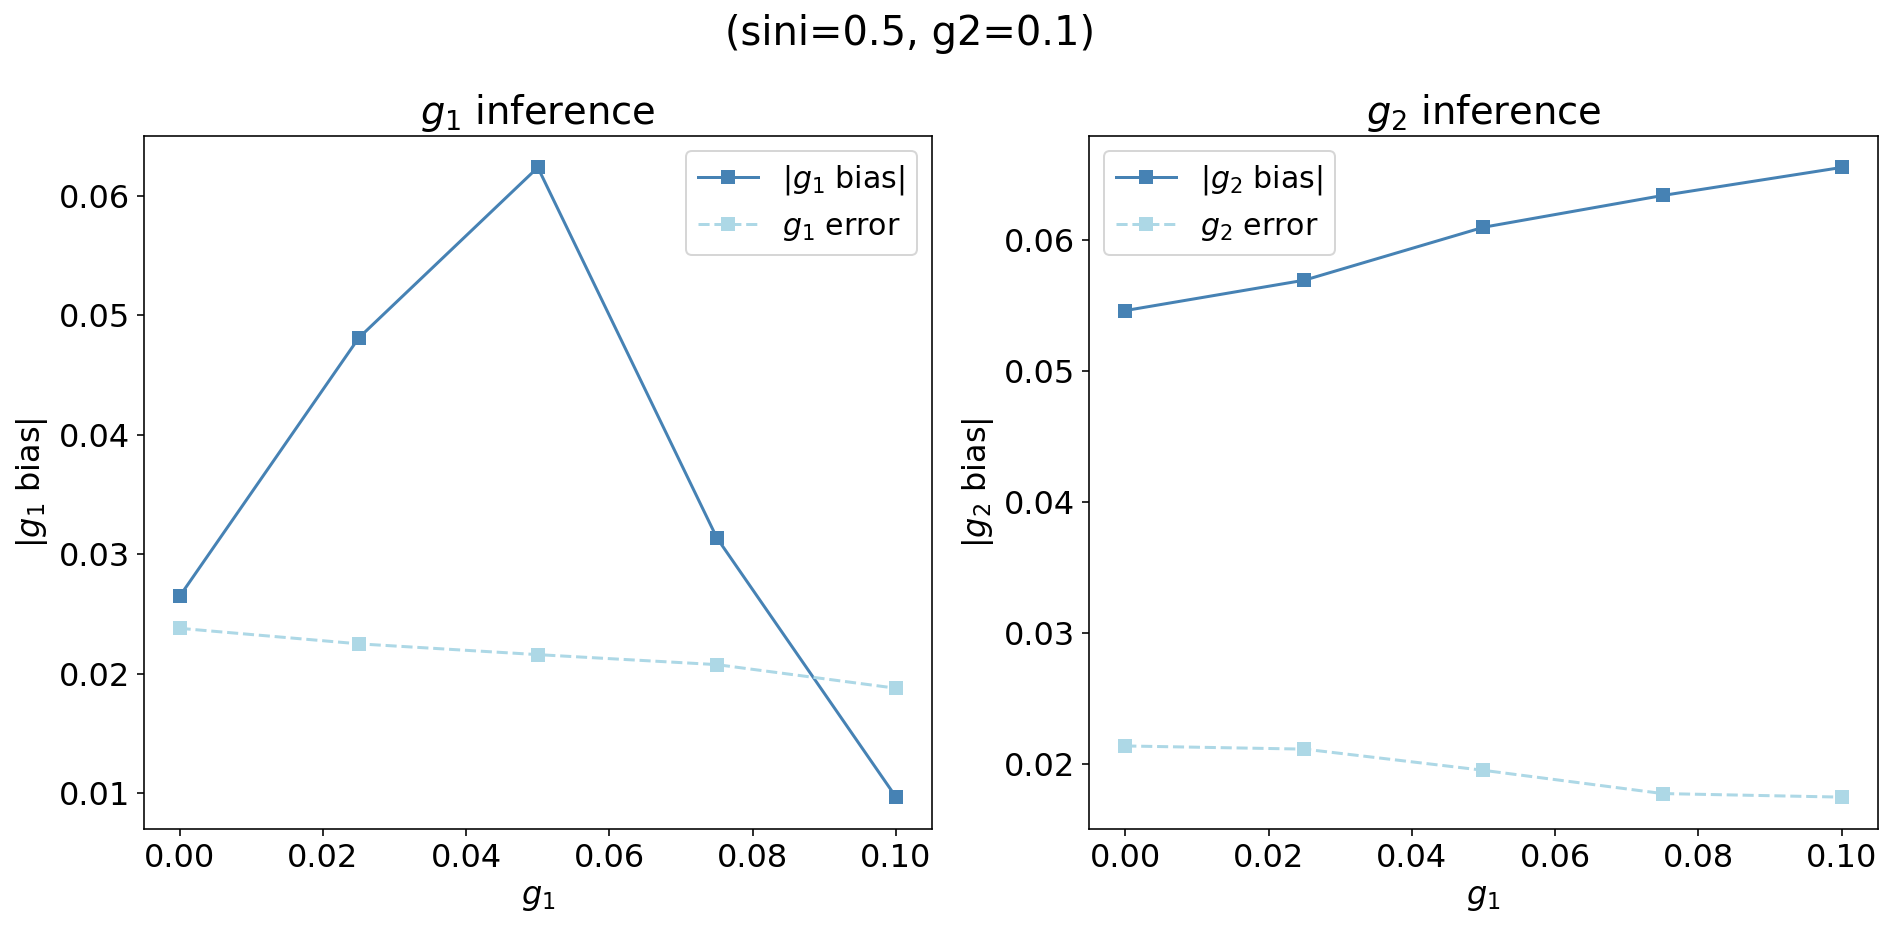

In [18]:
fig, ax = plt.subplots(1,2, figsize=(14.,6.5))
fig.subplots_adjust(left=0.12, right=0.98, bottom=0.11, top=0.85)
plt.rc('font',size=16)

ax[0].plot(g1_list, g1_bias_list_abs, 's', linestyle='-', label="|$g_{1}$ bias|", color='steelblue')
ax[0].plot(g1_list, g1_err_list, 's', linestyle='--', label="$g_{1}$ error", color='lightblue')#, mfc='none'

ax[0].legend(loc='best',prop={'size':15})
ax[0].set_title('$g_{1}$ inference')
ax[0].set_ylabel('|$g_{1}$ bias|')
ax[0].set_xlabel('$g_{1}$')

#########

ax[1].plot(g1_list, g2_bias_list_abs, 's', linestyle='-', label="|$g_{2}$ bias|", color='steelblue')
ax[1].plot(g1_list, g2_err_list, 's', linestyle='--', label="$g_{2}$ error", color='lightblue')#, mfc='none'

ax[1].legend(loc='best',prop={'size':15})
ax[1].set_title('$g_{2}$ inference')
ax[1].set_ylabel('|$g_{2}$ bias|')
ax[1].set_xlabel('$g_{1}$')


fig.suptitle(f'(sini={sini}, g2={g2})', fontsize=20)

#fig.savefig('/Users/hhg/Desktop/sigma_gamma.pdf')

Text(0.5, 0.98, '(sini=0.5, g1=0.1)')

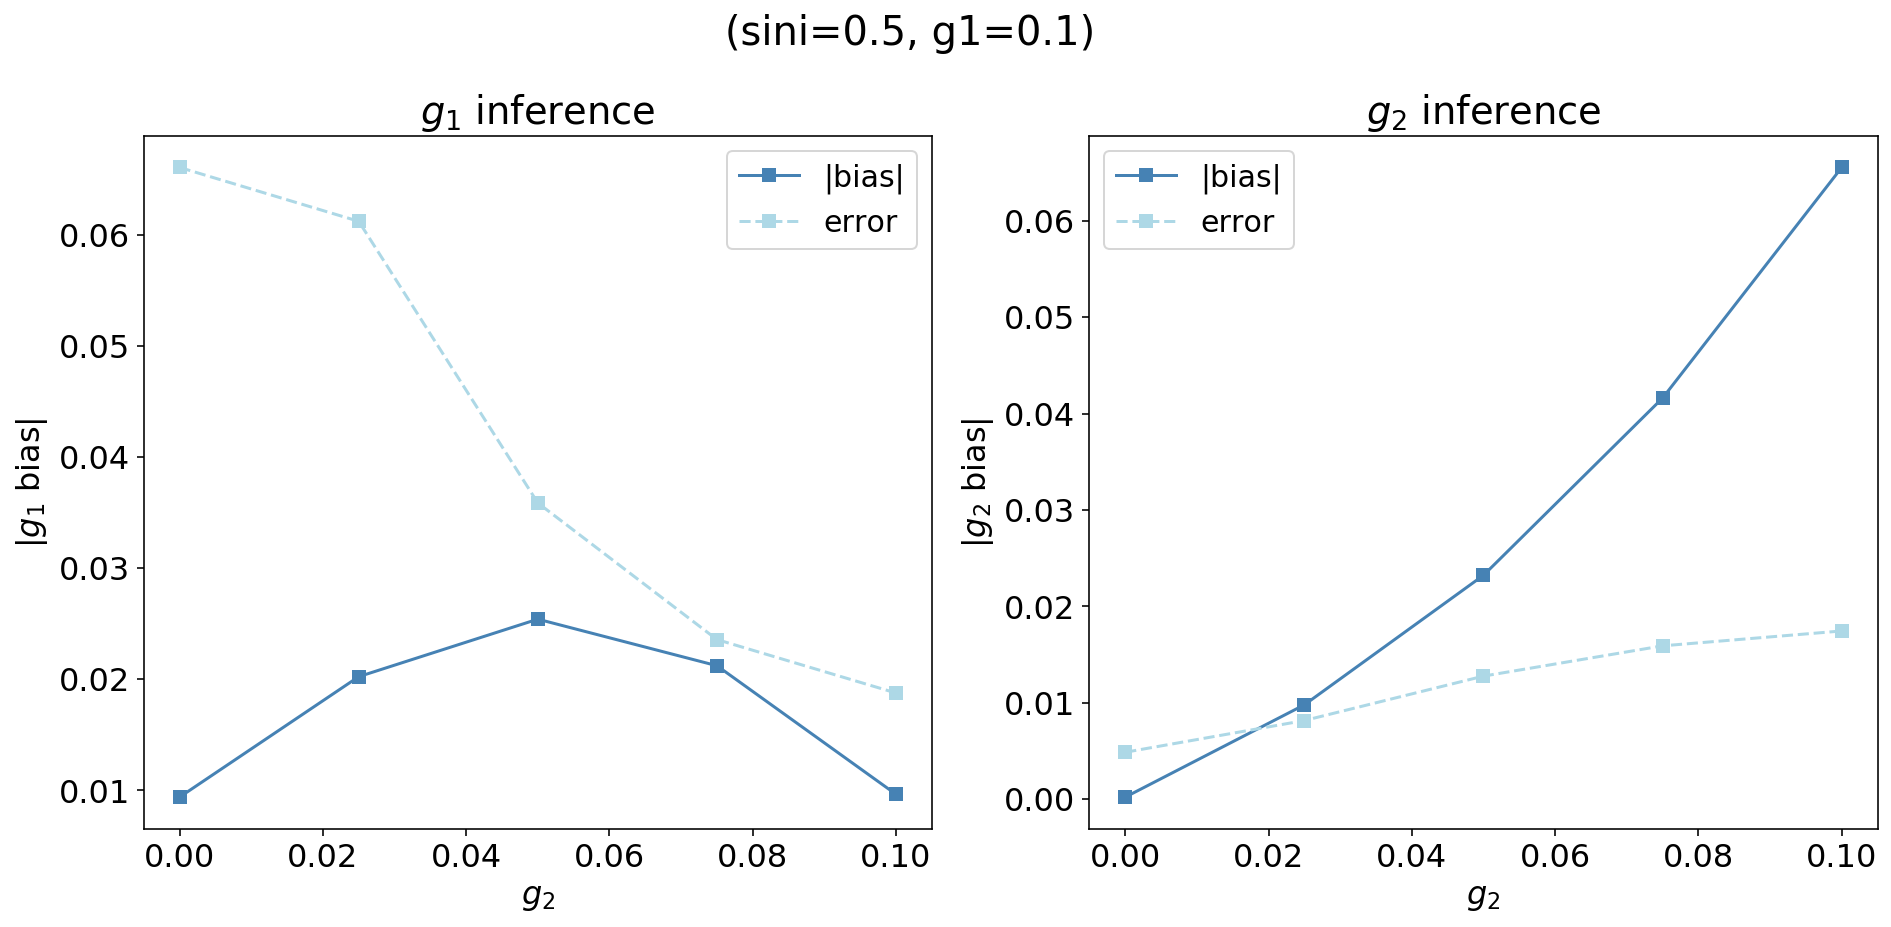

In [10]:
fig, ax = plt.subplots(1,2, figsize=(14.,6.5))
fig.subplots_adjust(left=0.12, right=0.98, bottom=0.11, top=0.85)
plt.rc('font',size=16)

ax[0].plot(g2_list, g1_bias_list_abs, 's', linestyle='-', label="|bias|", color='steelblue')
ax[0].plot(g2_list, g1_err_list, 's', linestyle='--', label="error", color='lightblue')#, mfc='none'

ax[0].legend(loc='best',prop={'size':15})
ax[0].set_title('$g_{1}$ inference')
ax[0].set_ylabel('|$g_{1}$ bias|')
ax[0].set_xlabel('$g_{2}$')

#########

ax[1].plot(g2_list, g2_bias_list_abs, 's', linestyle='-', label="|bias|", color='steelblue')
ax[1].plot(g2_list, g2_err_list, 's', linestyle='--', label="error", color='lightblue')#, mfc='none'

ax[1].legend(loc='best',prop={'size':15})
ax[1].set_title('$g_{2}$ inference')
ax[1].set_ylabel('|$g_{2}$ bias|')
ax[1].set_xlabel('$g_{2}$')


fig.suptitle(f'(sini={sini}, g1={g1})', fontsize=20)

#fig.savefig('/Users/hhg/Desktop/sigma_gamma.pdf')

# 2D contour visualization

In [20]:
sini = 0.5
g1 = 0.1
g2 = 0.05

chain_key = f"sini_{sini:.2f}_g1_{g1:.3f}_g2_{g2:.3f}"
fname_read = dir_chain+"chain_"+chain_key+'.pkl'
chain_info = load_pickle(fname_read)
Chain = ChainTool(chain_info, Nburn=150000, Nend=300000)

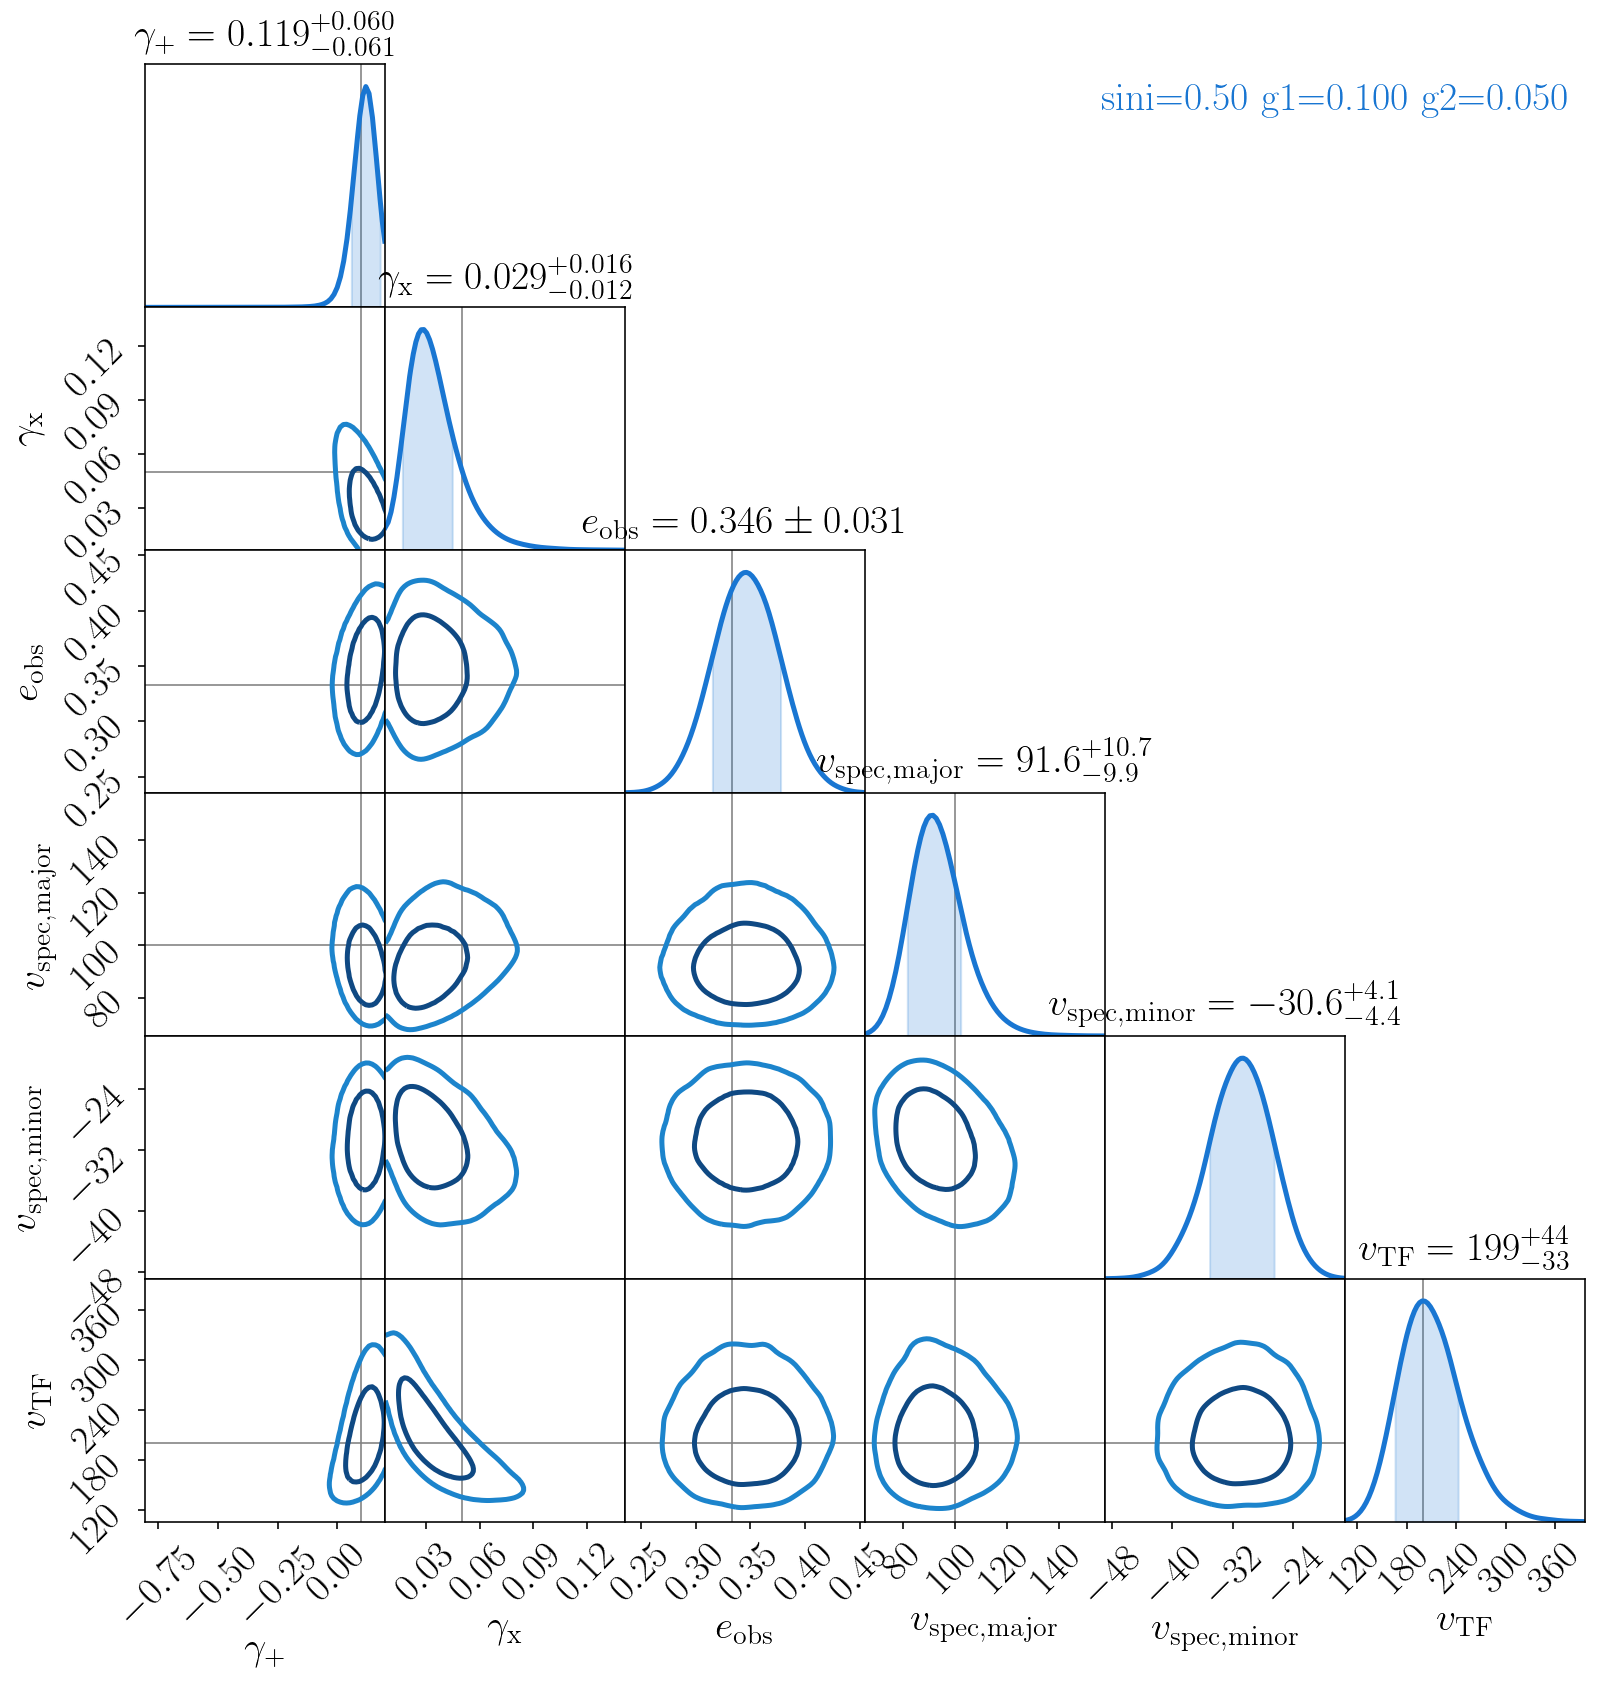

In [21]:
Nchains = 1
colors = [gray, lightblue, red, yellow, blue, yellowgreen, green, green, black]
lines = ["-", '--', "--", "-.", '-', ":", "--", ':']

statistics="max"

select_par_key = ['gamma_p', 'gamma_x', 'e_obs', 'v_spec_major', 'v_spec_minor', 'v_TF']

legend_chain = "sini=%.2f"%sini+"  g1=%.3f"%g1+"  g2=%.3f"%g2

parID1,parName1,par_x1 = Chain.select_par_info(select_par_key)

c = ChainConsumer()
c.add_chain(Chain.chain[:, parID1], parameters=parName1, name=legend_chain)

c.configure(linewidths=2.5,sigmas=np.array([0,1,2]),bins=0.5,sigma2d=False,label_font_size=20,tick_font_size=20,
            shade=[False]*Nchains,
            statistics=statistics,summary=True)

c.configure_truth(color="gray",lw=1,ls="-",alpha=0.8, zorder=-1)
fig = c.plotter.plot(legend=True, truth=par_x1)

fig.subplots_adjust(left=0.12, right=0.99, bottom=0.11, top=0.99)

fig.set_size_inches(2.5 + fig.get_size_inches())
#fig.savefig("fig_all_pars.pdf", transparent=True)